# 과제 10-5장 Linear Regression - 자전거 통행량 예측

시애틀 프리몬트 다리를 지나는 자전거 통행량을 날씨와 계절, 기타 요인에 따라 예측하시오. (p436 참고)

<img src="https://images.seattletimes.com/wp-content/uploads/2020/01/01022020_bike-count_114545.jpg?d=2040x1360" width=400>

Ken Lambert, "Bike ridership hits record highs on 2 Seattle routes", The Seattle Times, Jan. 6, 2020

1. 교재에서 제공하는 FremontBridge.csv 파일과 SeattleWeather.csv 파일을 읽어 pandas 의 DataFrame 을 각각 생성하시오. (https://github.com/jakevdp/bicycle-data)
2. 2020 년 이전 데이터만 선택하시오.
3. 일별 총 자전거 통행량을 계산하고, 그 계산 결과를 'counts' 컬럼에 추가하시오.
4. 월요일~일요일까지 요일을 이진 데이터로 각각 인코딩 하고, 그 결과를 요일을 나타내는 컬럼들(7개)에 추가하시오.
5. 공휴일 여부를 이진 데이터로 인코딩 하고, 그 결과를 'holiday' 컬럼에 추가하시오.
6. 일자별 평균 날씨 (TAVG) 를 계산한 후, 'temp' 컬럼에 추가하시오.
7. 일자별 강수량(PRCP)을 계산한 후, 'rainfall' 컬럼에 추가하시오.
8. 데이터에서 NA 를 제거하시오.
9. LinearRegression 모델을 이용하여 자전거 통행량을 예측하시오.
10. Matplotlib 를 이용하여 예측 결과를 시각화 하시오.


### 1. 교재에서 제공하는 FremontBridge.csv 파일과 SeattleWeather.csv 파일을 읽어 pandas 의 DataFrame 을 각각 생성하시오. 

(https://github.com/jakevdp/bicycle-data)

In [96]:
# url = 'https://raw.githubusercontent.com/jakevdp/bicycle-data/main'
# !curl -O {url}/FremontBridge.csv
# !curl -O {url}/SeattleWeather.csv

In [97]:
import pandas as pd
df_fremont = pd.read_csv("FremontBridge.csv", index_col=['Date'], parse_dates=True).sort_index()
df_weather = pd.read_csv("SeattleWeather.csv", index_col=['DATE'], parse_dates=True).sort_index()


C:\Users\user\AppData\Local\Temp\ipykernel_12880\2993488664.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_fremont = pd.read_csv("FremontBridge.csv", index_col=['Date'], parse_dates=True).sort_index()


In [98]:
df_fremont.shape

(147278, 3)

In [99]:
df_fremont.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0


In [100]:
df_weather.shape

(3653, 28)

In [121]:
df_weather.head()

,STATION,NAME,AWND,FMTM,PGTM,PRCP,SNOW,SNWD,TAVG,TMAX,...,WT04,WT05,WT08,WT09,WT13,WT14,WT16,WT17,WT18,WT22
DATE,,,,,,,,,,,,,,,,,,,,,
2012-01-01,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",10.51,NaN,NaN,0.00,0.0,0.0,NaN,55,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
2012-01-02,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",10.07,NaN,NaN,0.43,0.0,0.0,NaN,51,...,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN
2012-01-03,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",5.14,NaN,NaN,0.03,0.0,0.0,NaN,53,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
2012-01-04,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",10.51,NaN,NaN,0.80,0.0,0.0,NaN,54,...,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN
2012-01-05,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",13.65,NaN,NaN,0.05,0.0,0.0,NaN,48,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


### 2. 2020 년 이전 데이터만 선택하시오.

In [102]:
df_fremont = df_fremont.loc[df_fremont.index<"2020-01-01"]
# df_fremont = df_fremont.loc[:"2019"]
df_weather = df_weather[df_weather.index<"2020-01-01"]

In [103]:
df_fremont.shape

(127008, 3)

In [104]:
df_weather.shape

(2922, 28)

### 3. 일별 총 자전거 통행량을 계산하고, 그 계산 결과를 'counts' 컬럼에 추가하시오.

In [105]:
daily = df_fremont.resample('d').sum()
# daily['Total'] = daily.sum(axis=1)
daily.rename(columns={'Fremont Bridge Total': 'Total'}, inplace=True)

In [106]:
daily

,Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-03,7042.0,3520.0,3522.0
2012-10-04,6950.0,3416.0,3534.0
2012-10-05,6296.0,3116.0,3180.0
2012-10-06,4012.0,2160.0,1852.0
2012-10-07,4284.0,2382.0,1902.0
...,...,...,...
2019-12-27,2276.0,796.0,1480.0
2019-12-28,1676.0,764.0,912.0
2019-12-29,1846.0,816.0,1030.0


In [107]:
daily = daily[['Total']] # remove other columns

In [108]:
daily

,Total
Date,
2012-10-03,7042.0
2012-10-04,6950.0
2012-10-05,6296.0
2012-10-06,4012.0
2012-10-07,4284.0
...,...
2019-12-27,2276.0
2019-12-28,1676.0
2019-12-29,1846.0


### 4. 월요일~일요일까지 요일을 이진 데이터로 각각 인코딩 하고, 그 결과를 요일을 나타내는 컬럼들(7개)에 추가하시오.

In [109]:
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
for i in range(7):
    daily[days[i]] = (daily.index.dayofweek == i).astype(float)

C:\Users\user\AppData\Local\Temp\ipykernel_12880\4164828505.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daily[days[i]] = (daily.index.dayofweek == i).astype(float)


In [110]:
daily

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun
Date,,,,,,,,
2012-10-03,7042.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2012-10-04,6950.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2012-10-05,6296.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2012-10-06,4012.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2012-10-07,4284.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
2019-12-27,2276.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2019-12-28,1676.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2019-12-29,1846.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### 5. 공휴일 여부를 이진 데이터로 인코딩 하고, 그 결과를 'holiday' 컬럼에 추가하시오.

In [111]:
from pandas.tseries.holiday import USFederalHolidayCalendar
cal = USFederalHolidayCalendar()
holidays = cal.holidays('2012', '2020')

In [112]:
holidays[:5]

DatetimeIndex(['2012-01-02', '2012-01-16', '2012-02-20', '2012-05-28',
               '2012-07-04'],
              dtype='datetime64[ns]', freq=None)

In [113]:
pd.Series(1, index=holidays, name='holiday')
# index=holidays : holidays(공휴일)에 해당하는 인덱스에 1이라는 값을 할당

2012-01-02    1
2012-01-16    1
2012-02-20    1
2012-05-28    1
2012-07-04    1
             ..
2019-10-14    1
2019-11-11    1
2019-11-28    1
2019-12-25    1
2020-01-01    1
Name: holiday, Length: 81, dtype: int64

In [114]:
daily = daily.join(pd.Series(1, index=holidays, name='holiday'))
daily.head()
#daily와 새로만든 Series를 조인하지만 공휴일에 해당하지 않는 날에는 NaN값이 들어감

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday
Date,,,,,,,,,
2012-10-03,7042.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN
2012-10-04,6950.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN
2012-10-05,6296.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN
2012-10-06,4012.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN
2012-10-07,4284.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN


In [ ]:
daily['holiday'].fillna(0, inplace=True)
# NaN값 0으로 채우기

In [158]:
daily.index.isin(holidays)

array([False, False, False, ..., False, False, False])

In [161]:
daily.index.isin(holidays).size

2646

In [ ]:
# daily['holiday'] = daily.index.isin(holidays)

### 6. 일자별 평균 날씨 (TAVG) 를 계산한 후, 'temp' 컬럼에 추가하시오.

In [125]:
df_weather.loc[:"2012-01-05",:"TMIN"]

,STATION,NAME,AWND,FMTM,PGTM,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN
DATE,,,,,,,,,,,
2012-01-01,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",10.51,NaN,NaN,0.00,0.0,0.0,NaN,55,41
2012-01-02,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",10.07,NaN,NaN,0.43,0.0,0.0,NaN,51,37
2012-01-03,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",5.14,NaN,NaN,0.03,0.0,0.0,NaN,53,45
2012-01-04,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",10.51,NaN,NaN,0.80,0.0,0.0,NaN,54,42
2012-01-05,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",13.65,NaN,NaN,0.05,0.0,0.0,NaN,48,37


In [127]:
df_weather['temp'] = 0.5 * (df_weather['TMIN'] + df_weather['TMAX'])

In [ ]:
daily = daily.join(df_weather['temp'])

In [148]:
daily

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,temp
Date,,,,,,,,,,
2012-10-03,7042.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,56.0
2012-10-04,6950.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,56.5
2012-10-05,6296.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,59.5
2012-10-06,4012.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,60.5
2012-10-07,4284.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,60.5
...,...,...,...,...,...,...,...,...,...,...
2019-12-27,2276.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,41.0
2019-12-28,1676.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,44.0
2019-12-29,1846.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,45.5


### 7. 일자별 강수량(PRCP)을 계산한 후, 'rainfall' 컬럼에 추가하시오.

In [130]:
df_weather['rainfall'] = df_weather['PRCP']
df_weather['rainfall'][:5]

DATE
2012-01-01    0.00
2012-01-02    0.43
2012-01-03    0.03
2012-01-04    0.80
2012-01-05    0.05
Name: rainfall, dtype: float64

In [145]:
df_weather.shape

(2922, 30)

In [149]:
daily = daily.join(df_weather['rainfall'])
daily

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,temp,rainfall
Date,,,,,,,,,,,
2012-10-03,7042.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,56.0,0.00
2012-10-04,6950.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,56.5,0.00
2012-10-05,6296.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,59.5,0.00
2012-10-06,4012.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,60.5,0.00
2012-10-07,4284.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,60.5,0.00
...,...,...,...,...,...,...,...,...,...,...,...
2019-12-27,2276.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,41.0,0.01
2019-12-28,1676.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,44.0,0.00
2019-12-29,1846.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,45.5,0.01


### 8. 데이터에서 NA 를 제거하시오.

In [ ]:
daily.isnull().sum()
#이미 5번에서 처리했음

Total       0
Mon         0
Tue         0
Wed         0
Thu         0
Fri         0
Sat         0
Sun         0
holiday     0
temp        0
rainfall    0
dtype: int64

### 9. LinearRegression 모델을 이용하여 자전거 통행량을 예측하시오.

In [152]:
daily.head()

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,temp,rainfall
Date,,,,,,,,,,,
2012-10-03,7042.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,56.0,0.0
2012-10-04,6950.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,56.5,0.0
2012-10-05,6296.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,59.5,0.0
2012-10-06,4012.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,60.5,0.0
2012-10-07,4284.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,60.5,0.0


In [153]:
column_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun',
                'holiday', 'temp', 'rainfall']
X = daily[column_names]
y = daily['Total']

In [154]:
from sklearn.linear_model import LinearRegression

In [156]:
model = LinearRegression(fit_intercept=False)
model.fit(X, y)
daily['predicted'] = model.predict(X)

### 10. Matplotlib 를 이용하여 예측 결과를 시각화 하시오.

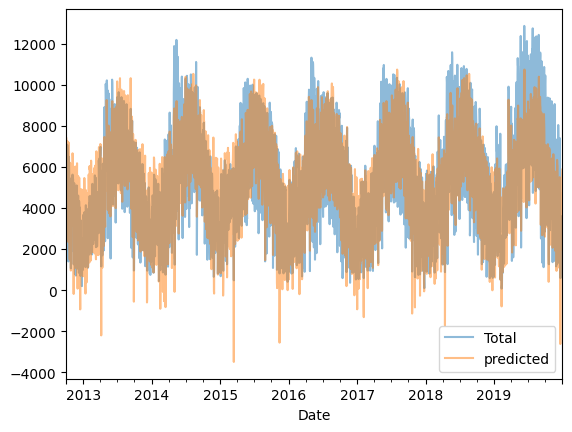

In [157]:
daily[['Total', 'predicted']].plot(alpha=0.5);